In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Creating the dataset
data = {
    'Age': [3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17],
    'Wing Length': [1.4, 1.5, 2.2, 2.4, 3.1, 3.2, 3.2, 3.9, 4.1, 4.7, 4.5, 5.2, 5.0]
}

df = pd.DataFrame(data)

Text(0, 0.5, 'Wing Length')

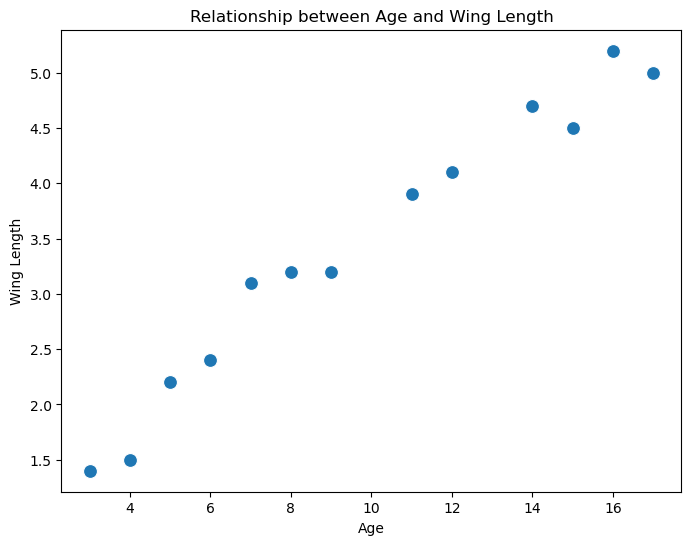

In [3]:
#Plot the relationship between Age and Wing Length.

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Wing Length', data=df, s=100)
plt.title('Relationship between Age and Wing Length')
plt.xlabel('Age')
plt.ylabel('Wing Length')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


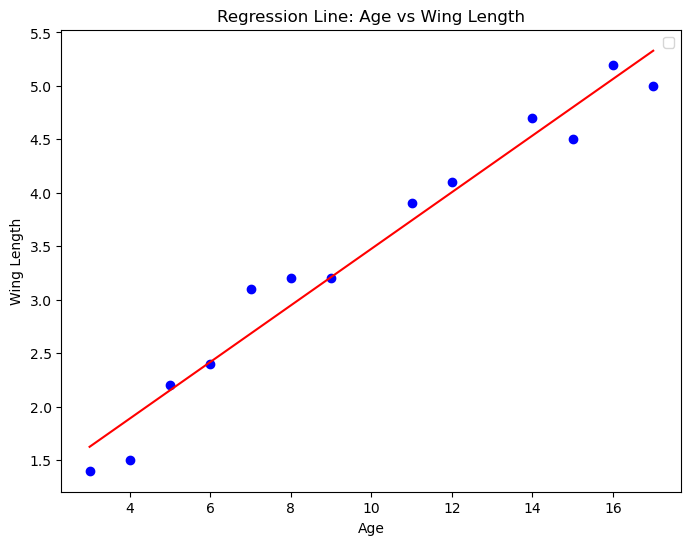

P-value: 3.0097431724571258e-09


In [11]:
#Calculate and plot the regression line.
slope, intercept, r_value, p_value, std_err = stats.linregress(df['Age'], df['Wing Length'])

# Calculate the regression line
df['Predicted Wing Length'] = intercept + slope * df['Age']

# Plot the data and the regression line
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Wing Length'], color='blue')
plt.plot(df['Age'], df['Predicted Wing Length'], color='red')

plt.title('Regression Line: Age vs Wing Length')
plt.xlabel('Age')
plt.ylabel('Wing Length')
plt.legend()
plt.show()

# Output the p-value
print(f"P-value: {p_value}")

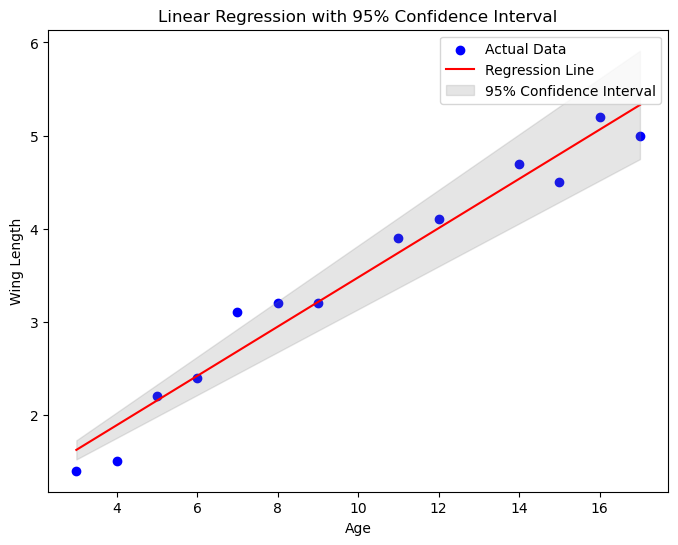

In [12]:
#Calculate and plot the confidence intervals on the slope of the regression.

# Degrees of freedom: number of data points minus 2 for linear regression
n = len(df['Age'])
df_regr = n - 2

# Critical t-value for 95% confidence
t_critical = stats.t.ppf(1 - 0.025, df_regr)

# Confidence interval calculation
confidence_interval = t_critical * std_err
lower_bound = slope - confidence_interval
upper_bound = slope + confidence_interval

# Printing the confidence intervals
lower_bound, upper_bound

# Plotting the data, regression line, and confidence intervals
plt.figure(figsize=(8, 6))

# Scatter plot of data points
plt.scatter(df['Age'], df['Wing Length'], color='blue', label='Actual Data')

# Regression line
plt.plot(df['Age'], intercept + slope * df['Age'], color='red', label='Regression Line')

# Confidence interval lines (upper and lower bounds)
plt.fill_between(df['Age'], 
                 intercept + lower_bound * df['Age'], 
                 intercept + upper_bound * df['Age'], 
                 color='gray', alpha=0.2, label='95% Confidence Interval')

plt.title('Linear Regression with 95% Confidence Interval')
plt.xlabel('Age')
plt.ylabel('Wing Length')
plt.legend()
plt.show()

In [13]:
#Calculate r^2 (the coefficient of determination)
# R-squared calculation
r_squared = r_value ** 2
print(f"R-squared: {r_squared}")

R-squared: 0.9633822518042855


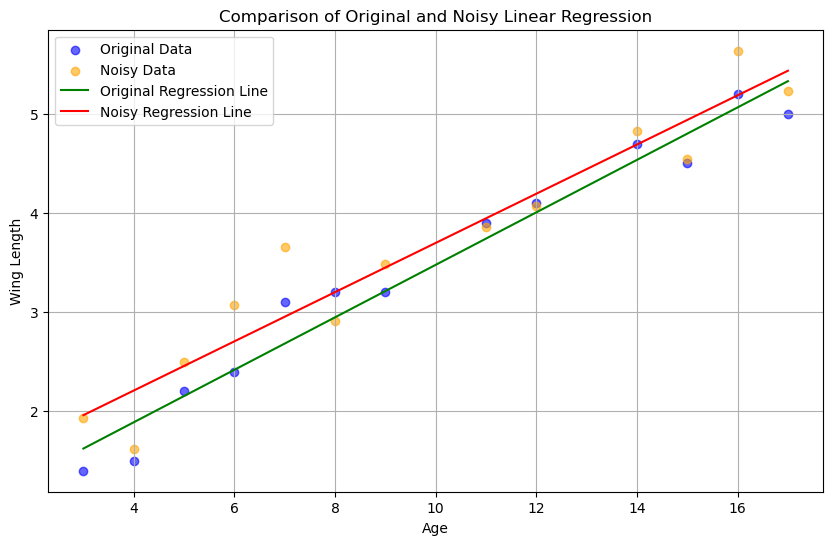

In [18]:
#Add some noise to the data and see how the regression changes.

# Original data
age = np.array([3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17])
wing_length = np.array([1.4, 1.5, 2.2, 2.4, 3.1, 3.2, 3.2, 3.9, 4.1, 4.7, 4.5, 5.2, 5.0])
df = pd.DataFrame({'Age': age, 'Wing Length': wing_length})

# Perform linear regression on the original data
slope_original, intercept_original, r_value_original, p_value_original, std_err_original = stats.linregress(df['Age'], df['Wing Length'])

# Set a seed for reproducibility and add noise
np.random.seed(0)
noise = np.random.normal(loc=0, scale=0.3, size=len(df['Wing Length']))  # Adjust scale for noise level
df['Wing Length Noisy'] = df['Wing Length'] + noise

# Perform linear regression on the noisy data
slope_noisy, intercept_noisy, r_value_noisy, p_value_noisy, std_err_noisy = stats.linregress(df['Age'], df['Wing Length Noisy'])

# Plotting the original and noisy data with both regression lines
plt.figure(figsize=(10, 6))

# Original data
plt.scatter(df['Age'], df['Wing Length'], color='blue', label='Original Data', alpha=0.6)

# Noisy data
plt.scatter(df['Age'], df['Wing Length Noisy'], color='orange', label='Noisy Data', alpha=0.6)

# Regression line for original data
plt.plot(df['Age'], intercept_original + slope_original * df['Age'], color='green', label='Original Regression Line')

# Regression line for noisy data
plt.plot(df['Age'], intercept_noisy + slope_noisy * df['Age'], color='red', label='Noisy Regression Line')

plt.title('Comparison of Original and Noisy Linear Regression')
plt.xlabel('Age')
plt.ylabel('Wing Length')
plt.legend()
plt.grid()
plt.show()